<h1>Problem Statement</h1> <br>
A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider <b>BoomBikes</b> has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:
<li>Which variables are significant in predicting the demand for shared bikes.
<li>How well those variables describe the bike demands
Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

<h2>Business Goal:</h2>


You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



<h2>Step 1 : Importing necessary libraries </h2>

In [138]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns
# Regression libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

<h2>Step 2 : Reading and Understanding the Data</h2>

In [139]:
# read the dataset
bike_data=pd.read_csv('day.csv')
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [140]:
#Inspect various aspects of the dataframe:
bike_data.shape

(730, 16)

In [141]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [142]:
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<h4>Data Quality Check:<br><br> Checking for null/missing values in the dataset</h4>

In [143]:
# checking for the null values in each column
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

<b>There are no null values in the dataset.

<h4>Checking for duplicates in the dataset</h4>

In [144]:
bike_data.drop_duplicates(inplace=True)
bike_data.shape

(730, 16)

<b>There are no duplicates in the dataset.

In [145]:
# Checking out the columns present in the dataframe
bike_data.columns.sort_values()


Index(['atemp', 'casual', 'cnt', 'dteday', 'holiday', 'hum', 'instant', 'mnth',
       'registered', 'season', 'temp', 'weathersit', 'weekday', 'windspeed',
       'workingday', 'yr'],
      dtype='object')

<h2>Step 3: Data Preparation & EDA </h2>

Dropping unwanted columns : Following columns can be dropped from the dataframe:
<li>instant as it is just the index for each row so it can be dropped. 
<li>dteday as it shows the date which can be observed with the help of yr and mnth column 
<li>casual and registered column because combination of these two shows cnt(total bike count) column which is the main focus.

In [146]:
#dropping unwanted columns
bike_data.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [147]:
bike_data.shape

(730, 12)

<h5>Data Conversion:
Converting numerical value into specified categorical value.

Converting season values (1, 2,3,4) into a categorical variable according to data dictionary

In [148]:
# Mapping numerical values of season to specified labels according to data dictionary
bike_data.season = bike_data.season.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})

Converting weathrsit values (1, 2,3,4) into a categorical variable according to data dictionary

In [149]:
# Mapping numerical values of weathersit to specified labels.
bike_data.weathersit = bike_data.weathersit.map({1:'Clear',2:'Mist',3:'Light_snow_rain',4:'Heavy_snow_rain'})

Converting mnth values (1, 2, ... , 11, 12) into a categorical variable like January, February, ... , November, December

In [150]:
# Mapping numerical values of month to specified labels.
bike_data.mnth = bike_data.mnth.map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})

Mapping numerical values of weekday to specified labels.

In [151]:
# Mapping numerical values of weekday to specified labels.
bike_data.weekday  = bike_data.weekday .map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})

In [152]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


<h3>Exploratory Data Analysis (EDA)</h3>

Performind EDA to get insights from the data

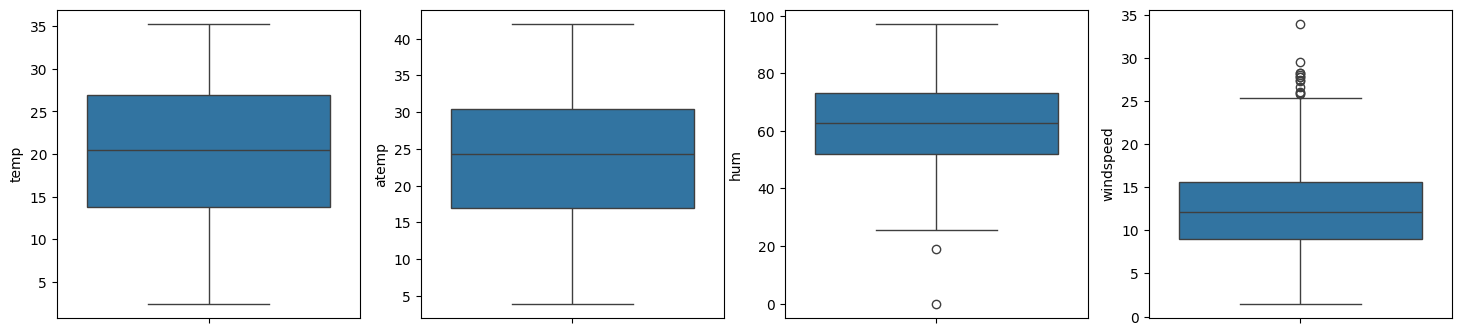

In [153]:
# Analysing the continuous (numerical) variables
cols = ['temp', 'atemp', 'hum', 'windspeed']
plt.figure(figsize=(18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y=col, data=bike_data)
    i+=1

There is no outliers in the given dataset.

<h4><b>Visualising all numeric columns with pairplot</h4>

Let's make a pairplot of all the numeric variables

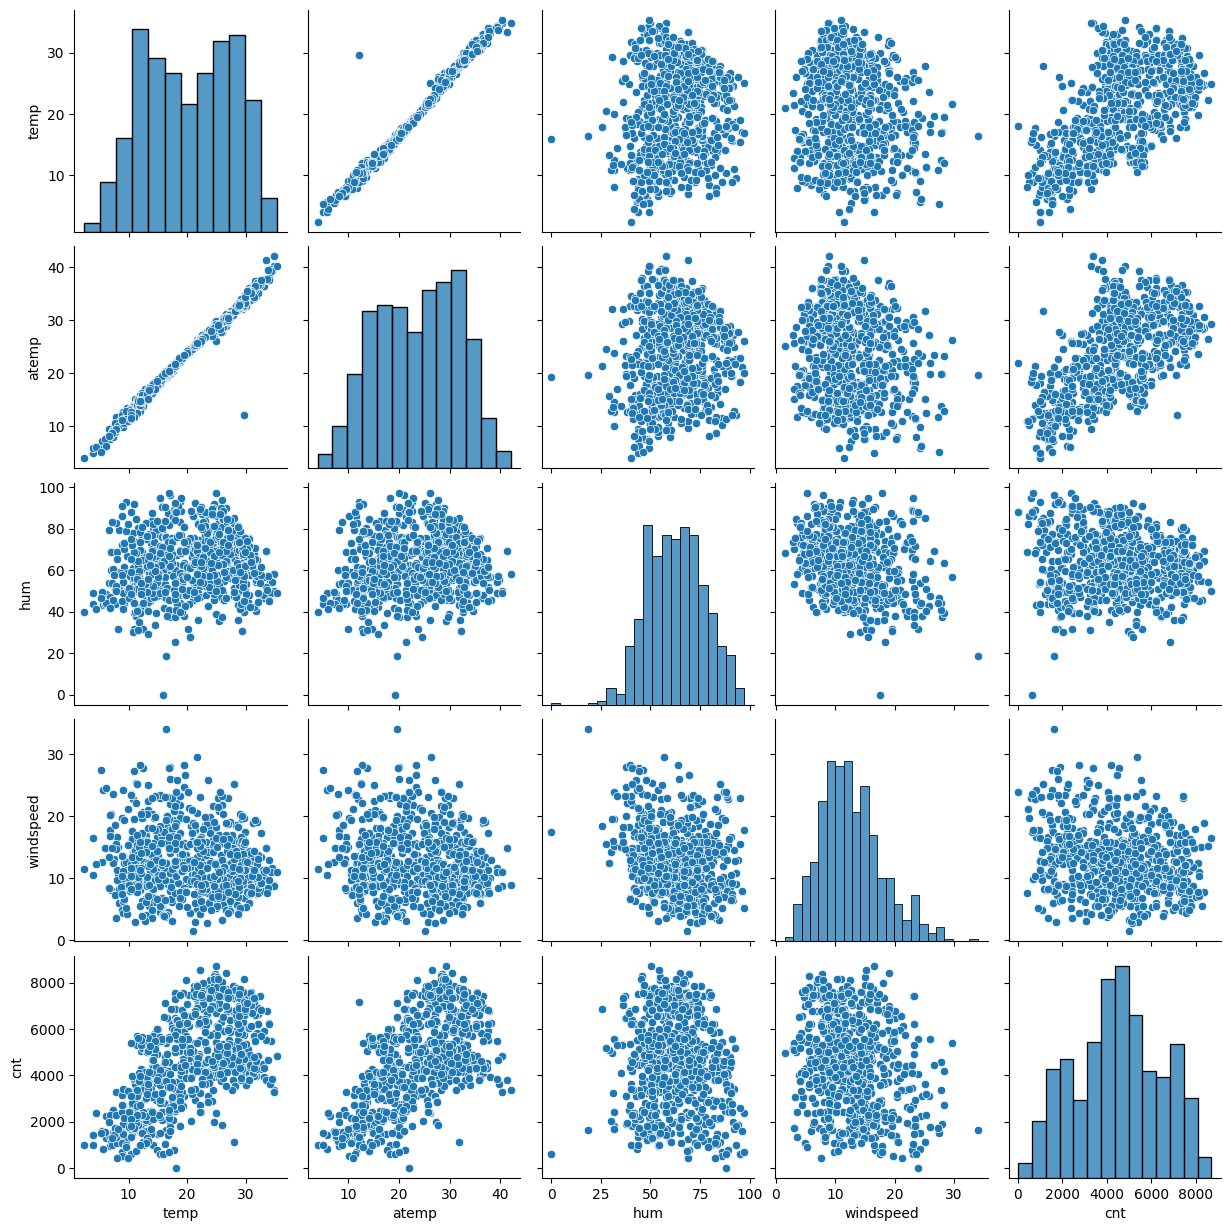

In [154]:
sns.pairplot(data=bike_data, vars=['temp', 'atemp', 'hum','windspeed','cnt'])
plt.show()

Inference : From above, we can say that temp and atemp has highest correlation with the target variable 'cnt'. And it is also observed that temp and atemp are highly correlated with each other.

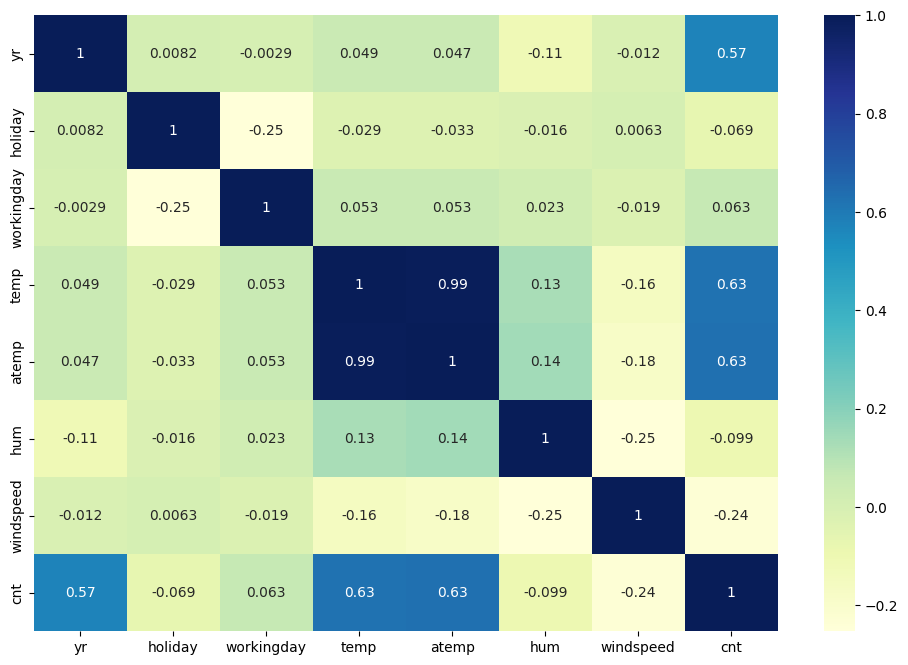

In [155]:
# Let's check the correlation coefficients to see which variables are highly correlated
plt.figure(figsize = (12, 8))
sns.heatmap(bike_data.corr(numeric_only=True), annot = True, cmap="YlGnBu")
plt.show()

There is high correlation between temp and atemp as indicated with correlation value of 0.99. Both of the parameters cannot be used in the model due to multicolinearity. We will deal with it later while model building

<b>Visualising Categorical Variables : Using a barplot

In [156]:
def plot_cat_columns(column):
    plt.figure(figsize = (10,4))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=bike_data,palette='flare')
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=bike_data, hue='yr',palette='Set1')
    plt.legend(labels=['2018', '2019'])
    plt.show()


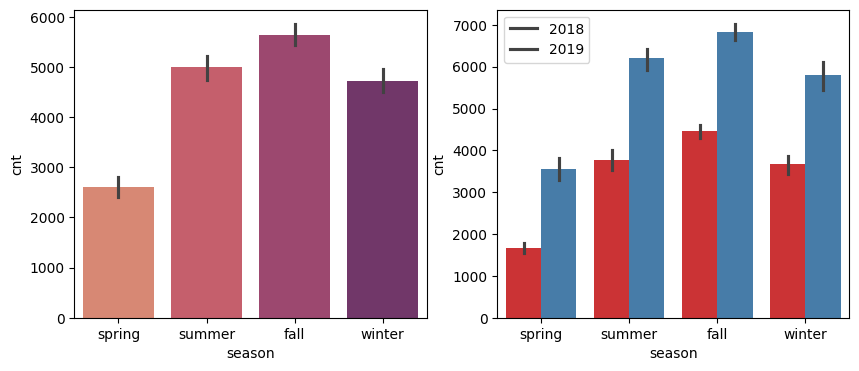

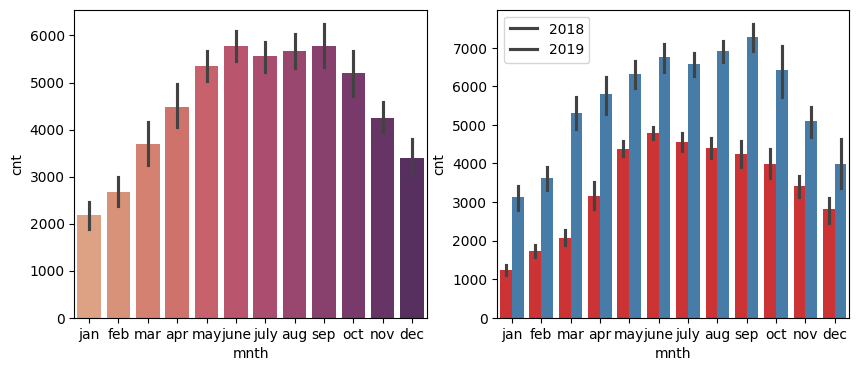

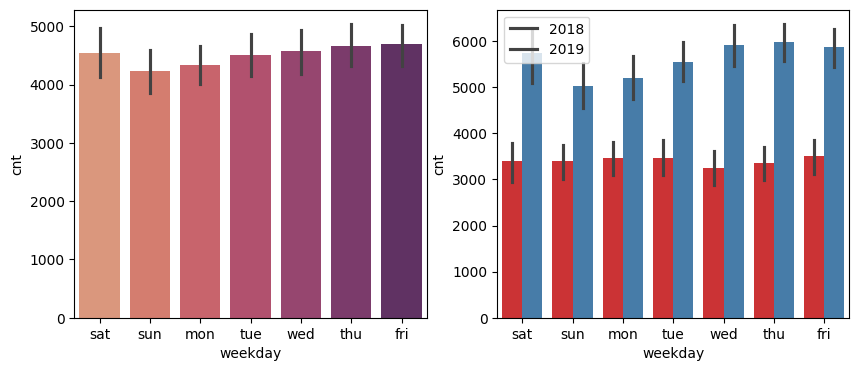

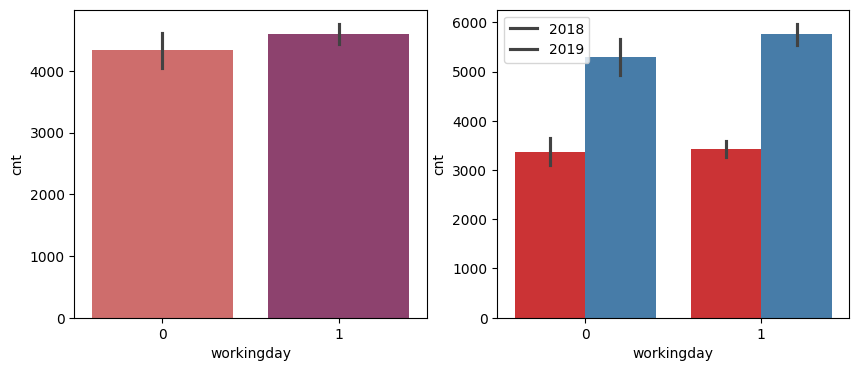

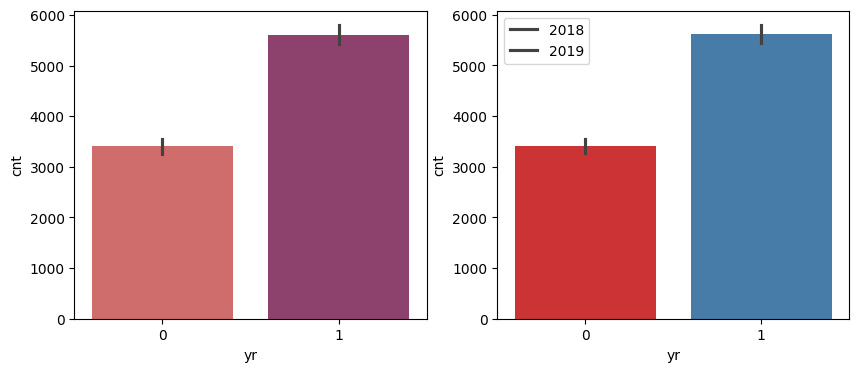

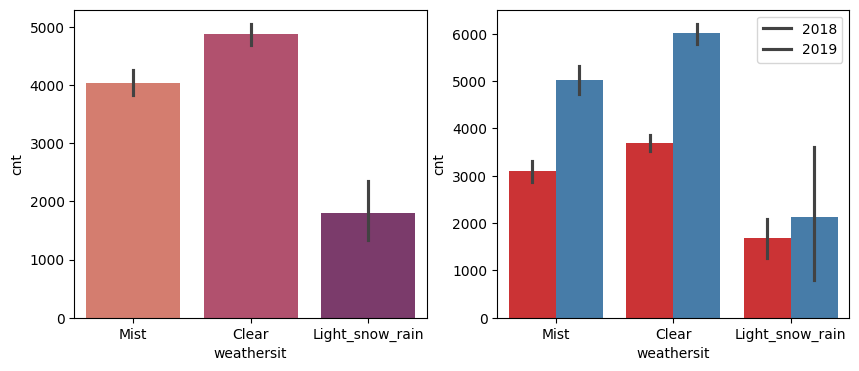

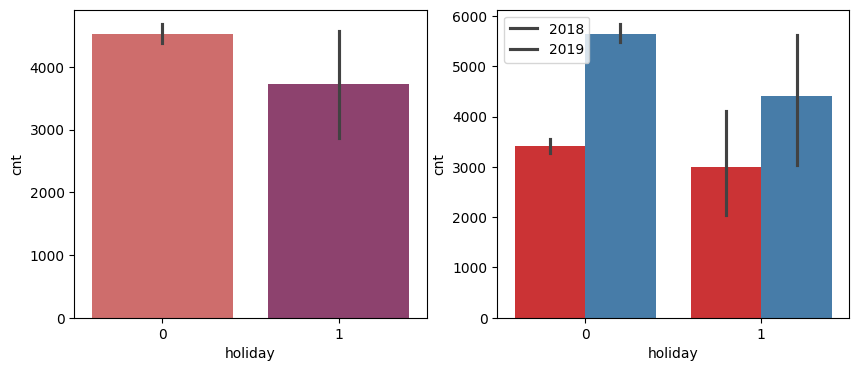

In [157]:
col_list=['season','mnth','weekday','workingday','yr','weathersit','holiday']
for i in col_list:
    plot_cat_columns(bike_data[i])

<b>From above plot we can draw these insights:
</b>

<li>Season: Fall has highest demand for rental bikes
<li>Every month the demand for rental bike is increasing till June. September has the highest number of demand then it is decreasing.
<li>During weekdays and workingdays demands don't have that much of variation.
<li>Clear weathersit has highest demand
<li>Demand for rental bikes decreases on holiday
<li> 2019 has more demand than 2018. The demand is increasing year by year

<h2>Data Preparation</h2>

<h3>Creation of Dummy Variables</h3>

Creating dummy variables for categorical features.
Dummy variables will be created for these categorical variables - season, mnth, weekday, and weathersit.

In [158]:
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,jan,0,sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [159]:
bike_data.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [160]:
# creating dummy values for all categorical variables

bike_data = pd.get_dummies(data=bike_data,columns=["season","mnth","weekday","weathersit"],drop_first=True,dtype='int')

In [161]:
bike_data.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'season_spring', 'season_summer', 'season_winter', 'mnth_aug',
       'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_july', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'mnth_sep',
       'weekday_mon', 'weekday_sat', 'weekday_sun', 'weekday_thu',
       'weekday_tue', 'weekday_wed', 'weathersit_Light_snow_rain',
       'weathersit_Mist'],
      dtype='object')

In [162]:
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


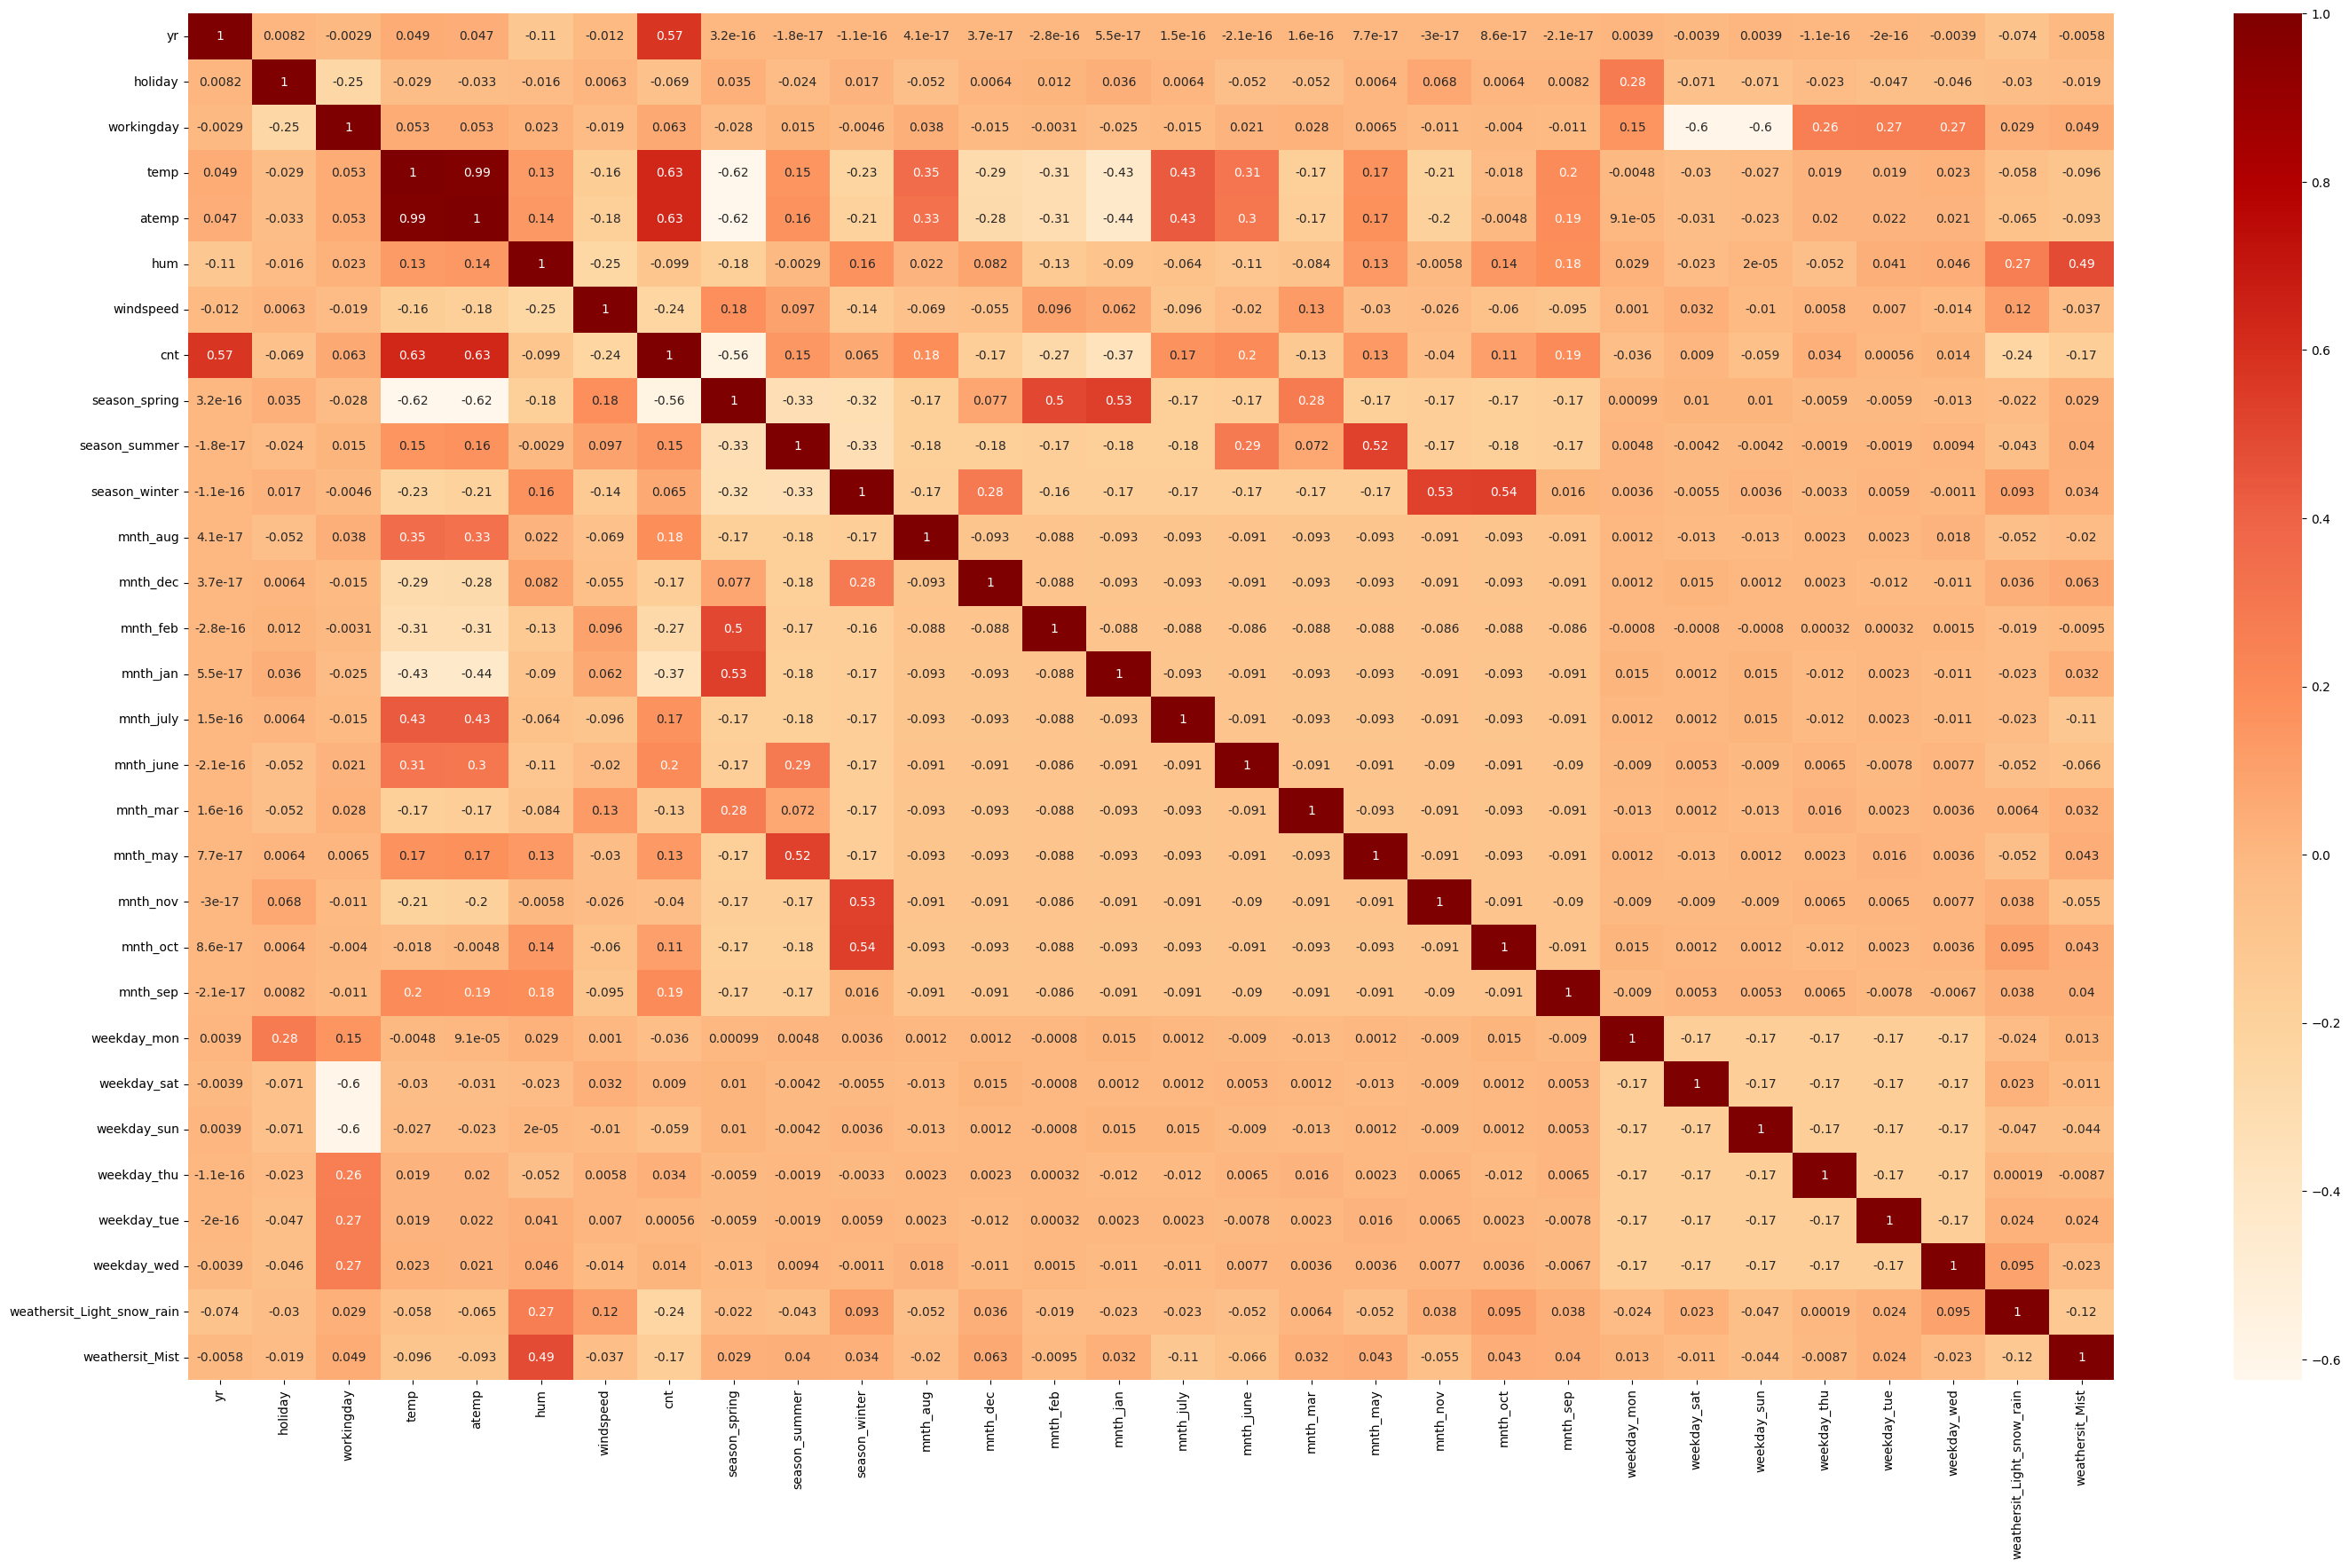

In [163]:
# Checking how are all these related to the dependent variable via correlation
plt.figure(figsize = (35, 20))
corr_df = bike_data[list(bike_data.columns)].corr(numeric_only = True)
sns.heatmap(data = corr_df, annot = True, cmap = 'OrRd')
plt.show()

<h2>Step 4: Model Building</h2>

<h3>Splitting the data set into test and train set</h3>

In [164]:
# splitting the dataframe into train and test
np.random.seed(0)
train_df,test_df=train_test_split(bike_data, train_size=0.7,test_size=0.3,random_state=100)

In [165]:
test_df.shape

(219, 30)

In [166]:
train_df.shape

(510, 30)

<h3>Feature Scaling: </h3>

In [167]:
train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
653,1,0,1,19.201653,23.0423,55.8333,12.208807,7534,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,29.246653,33.1448,70.4167,11.083475,7216,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,16.980847,20.6746,62.1250,10.792293,4066,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,10.489153,11.5850,48.3333,23.500518,1796,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,15.443347,18.8752,48.9583,8.708325,4220,0,1,...,0,0,0,1,0,0,0,0,0,1


In [168]:
scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

train_df[num_vars] = scaler.fit_transform(train_df[num_vars])
train_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,...,1,0,0,0,0,0,1,0,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1


In [169]:
train_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.243137,0.245098,...,0.086275,0.080392,0.150980,0.154902,0.143137,0.133333,0.131373,0.158824,0.029412,0.343137
std,0.500429,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.429398,0.430568,...,0.281045,0.272166,0.358381,0.362166,0.350557,0.340268,0.338139,0.365870,0.169124,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


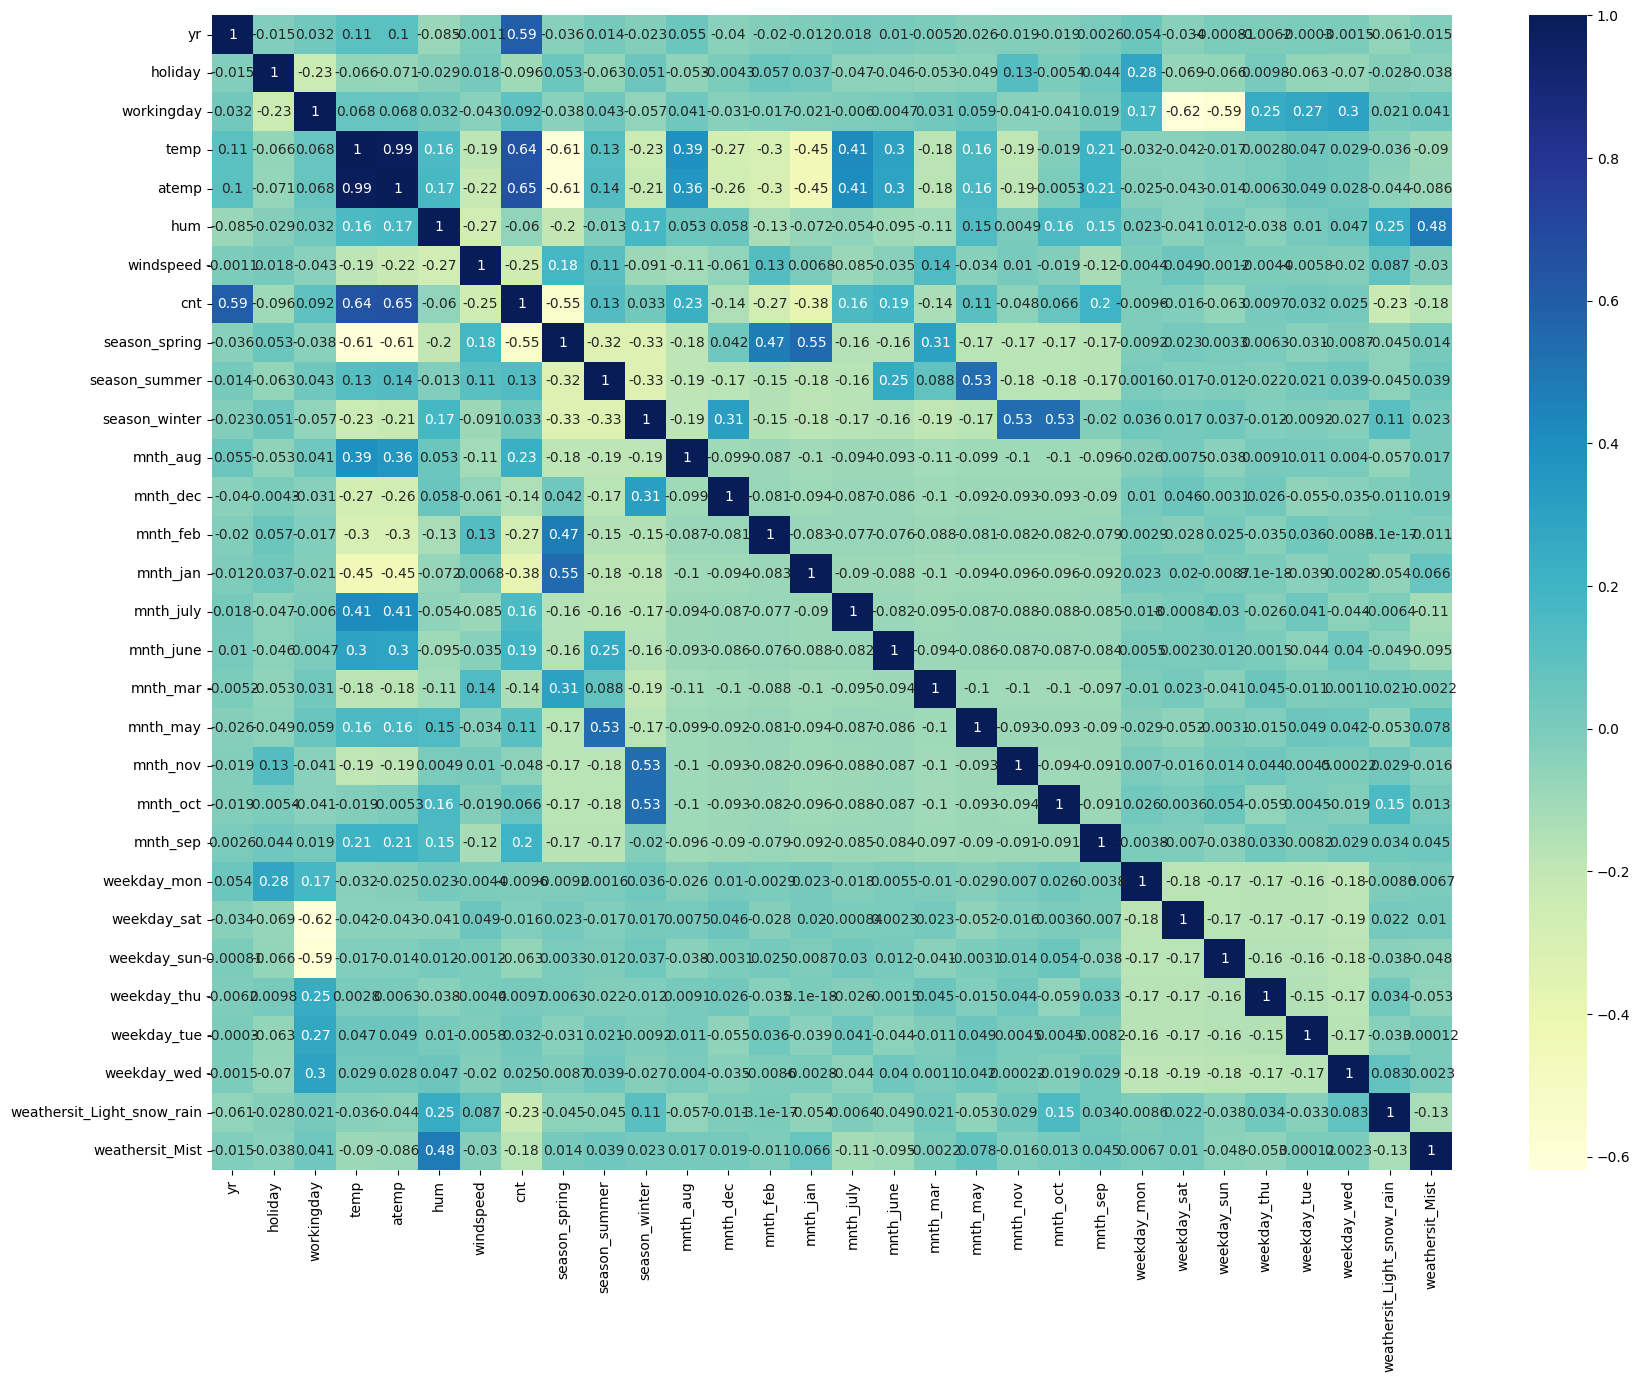

In [170]:
plt.figure(figsize = (20, 15))
sns.heatmap(train_df.corr(numeric_only=True), annot = True, cmap="YlGnBu")
plt.show()

From this we can say that, year and temp seems correlated with cnt the most.

### Dividing into X and Y sets for the model building

In [171]:
y_train=train_df.pop('cnt')
X_train=train_df

In [172]:
X_train.shape

(510, 29)

In [173]:
y_train.shape

(510,)

<h3> Selecting Features using Recursive Feature Elimination (RFE) approach </h3>

Selecting top 15 features generated using RFE

In [174]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [175]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 6),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_aug', False, 8),
 ('mnth_dec', False, 4),
 ('mnth_feb', False, 5),
 ('mnth_jan', False, 2),
 ('mnth_july', True, 1),
 ('mnth_june', False, 15),
 ('mnth_mar', False, 14),
 ('mnth_may', False, 7),
 ('mnth_nov', False, 3),
 ('mnth_oct', False, 13),
 ('mnth_sep', True, 1),
 ('weekday_mon', False, 9),
 ('weekday_sat', True, 1),
 ('weekday_sun', True, 1),
 ('weekday_thu', False, 11),
 ('weekday_tue', False, 10),
 ('weekday_wed', False, 12),
 ('weathersit_Light_snow_rain', True, 1),
 ('weathersit_Mist', True, 1)]

In [176]:
# selecting the selected variable via RFE in col list

col = X_train.columns[rfe.support_]
print(col)

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'mnth_july',
       'mnth_sep', 'weekday_sat', 'weekday_sun', 'weathersit_Light_snow_rain',
       'weathersit_Mist'],
      dtype='object')


In [177]:
X_train.columns[~rfe.support_]

Index(['atemp', 'mnth_aug', 'mnth_dec', 'mnth_feb', 'mnth_jan', 'mnth_june',
       'mnth_mar', 'mnth_may', 'mnth_nov', 'mnth_oct', 'weekday_mon',
       'weekday_thu', 'weekday_tue', 'weekday_wed'],
      dtype='object')

In [178]:
# Creating dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [179]:
X_train_rfe.shape

(510, 15)

In [180]:
#Function to calculate the VIFs for the new model

def calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 


In [181]:
calculate_vif(X_train_rfe)

,Features,VIF
2,workingday,50.69
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
14,weathersit_Mist,1.57


<h5>Model 1</h5>

Building our first model using statsmodel with the selected features from RFE approach

In [182]:
x_train_lm=sm.add_constant(X_train_rfe)

lr_1=sm.OLS(y_train,x_train_lm).fit()
lr_1.params

const                         0.198900
yr                            0.229738
holiday                      -0.018955
workingday                    0.083695
temp                          0.527819
hum                          -0.159467
windspeed                    -0.180601
season_spring                -0.055434
season_summer                 0.052613
season_winter                 0.100294
mnth_july                    -0.054881
mnth_sep                      0.081773
weekday_sat                   0.093682
weekday_sun                   0.040479
weathersit_Light_snow_rain   -0.246332
weathersit_Mist              -0.057847
dtype: float64

In [183]:
lr_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.13e-191
Time:                        19:14:58   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1989      0.028      7.181      0.000       0.144       0.253
yr                             0.2297      0.008     28.660      0.000       0.214       0.245
holiday                       -0.0190      0.021     -0.892      0.373      -0.061       0.023
workingday                     0.0837      0.010      8.672      0.000       0.065       0.103
temp                           0.5278      0.033     15.897      0.000       0.463       0.593
hum                           -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                     -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring                 -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer                  0.0526      0.015      3.553      0.000       0.024       0.082
season_winter                  0.1003      0.017      5.890      0.000       0.067       0.134
mnth_july                     -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_sep                       0.0818      0.016      4.956      0.000       0.049       0.114
weekday_sat                    0.0937      0.012      8.045      0.000       0.071       0.117
weekday_sun                    0.0405      0.012      3.304      0.001       0.016       0.065
weathersit_Light_snow_rain    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
weathersit_Mist               -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                     5.78e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.52e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [184]:
calculate_vif(X_train_rfe)

,Features,VIF
2,workingday,50.69
11,weekday_sat,12.20
12,weekday_sun,11.79
6,season_spring,5.02
3,temp,3.62
8,season_winter,3.49
1,holiday,2.91
7,season_summer,2.61
4,hum,1.91
14,weathersit_Mist,1.57


<h5>Model 2:</h5> 

Excluding holiday due to its elevated p-value of 0.373.

In [185]:
X_train_rfe_2 = X_train_rfe.drop(['holiday'], axis = 1)
x_train_lm=sm.add_constant(X_train_rfe_2)

lr_2=sm.OLS(y_train,x_train_lm).fit()
lr_2.params

const                         0.179945
yr                            0.229738
workingday                    0.102650
temp                          0.527819
hum                          -0.159467
windspeed                    -0.180601
season_spring                -0.055434
season_summer                 0.052613
season_winter                 0.100294
mnth_july                    -0.054881
mnth_sep                      0.081773
weekday_sat                   0.112637
weekday_sun                   0.059434
weathersit_Light_snow_rain   -0.246332
weathersit_Mist              -0.057847
dtype: float64

In [186]:
lr_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.13e-191
Time:                        19:15:51   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1799      0.042      4.276      0.000       0.097       0.263
yr                             0.2297      0.008     28.660      0.000       0.214       0.245
workingday                     0.1027      0.025      4.047      0.000       0.053       0.152
temp                           0.5278      0.033     15.897      0.000       0.463       0.593
hum                           -0.1595      0.037     -4.268      0.000      -0.233      -0.086
windspeed                     -0.1806      0.025     -7.110      0.000      -0.231      -0.131
season_spring                 -0.0554      0.021     -2.694      0.007      -0.096      -0.015
season_summer                  0.0526      0.015      3.553      0.000       0.024       0.082
season_winter                  0.1003      0.017      5.890      0.000       0.067       0.134
mnth_july                     -0.0549      0.018     -3.035      0.003      -0.090      -0.019
mnth_sep                       0.0818      0.016      4.956      0.000       0.049       0.114
weekday_sat                    0.1126      0.027      4.202      0.000       0.060       0.165
weekday_sun                    0.0594      0.027      2.206      0.028       0.006       0.112
weathersit_Light_snow_rain    -0.2463      0.026     -9.449      0.000      -0.298      -0.195
weathersit_Mist               -0.0578      0.010     -5.559      0.000      -0.078      -0.037
==============================================================================
Omnibus:                       64.879   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              158.454
Skew:                          -0.661   Prob(JB):                     3.91e-35
Kurtosis:                       5.390   Cond. No.                         25.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
calculate_vif(X_train_rfe_2)

,Features,VIF
3,hum,32.14
2,temp,18.98
1,workingday,18.41
10,weekday_sat,4.91
4,windspeed,4.90
5,season_spring,4.80
11,weekday_sun,4.76
7,season_winter,3.71
6,season_summer,3.03
13,weathersit_Mist,2.31


<h5>Model 3</h5>

Excluding humidity due to its high VIF value.

In [188]:
X_train_rfe_3 = X_train_rfe_2.drop(['hum'], axis = 1)
x_train_lm=sm.add_constant(X_train_rfe_3)

lr_3=sm.OLS(y_train,x_train_lm).fit()
lr_3.params

const                         0.100521
yr                            0.233626
workingday                    0.103407
temp                          0.492017
windspeed                    -0.149124
season_spring                -0.065288
season_summer                 0.046496
season_winter                 0.085870
mnth_july                    -0.049971
mnth_sep                      0.075781
weekday_sat                   0.115156
weekday_sun                   0.057148
weathersit_Light_snow_rain   -0.290444
weathersit_Mist              -0.083515
dtype: float64

In [189]:
lr_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     203.0
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          5.73e-189
Time:                        19:16:44   Log-Likelihood:                 508.65
No. Observations:                 510   AIC:                            -989.3
Df Residuals:                     496   BIC:                            -930.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.1005      0.038      2.618      0.009       0.025       0.176
yr                             0.2336      0.008     28.839      0.000       0.218       0.250
workingday                     0.1034      0.026      4.008      0.000       0.053       0.154
temp                           0.4920      0.033     15.056      0.000       0.428       0.556
windspeed                     -0.1491      0.025     -6.032      0.000      -0.198      -0.101
season_spring                 -0.0653      0.021     -3.139      0.002      -0.106      -0.024
season_summer                  0.0465      0.015      3.101      0.002       0.017       0.076
season_winter                  0.0859      0.017      5.058      0.000       0.053       0.119
mnth_july                     -0.0500      0.018     -2.723      0.007      -0.086      -0.014
mnth_sep                       0.0758      0.017      4.532      0.000       0.043       0.109
weekday_sat                    0.1152      0.027      4.225      0.000       0.062       0.169
weekday_sun                    0.0571      0.027      2.085      0.038       0.003       0.111
weathersit_Light_snow_rain    -0.2904      0.024    -11.931      0.000      -0.338      -0.243
weathersit_Mist               -0.0835      0.009     -9.669      0.000      -0.100      -0.067
==============================================================================
Omnibus:                       66.977   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              163.728
Skew:                          -0.681   Prob(JB):                     2.80e-36
Kurtosis:                       5.419   Cond. No.                         22.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [191]:
calculate_vif(X_train_rfe_3)

,Features,VIF
1,workingday,16.19
2,temp,12.73
3,windspeed,4.75
9,weekday_sat,4.45
10,weekday_sun,4.21
4,season_spring,3.82
6,season_winter,2.80
5,season_summer,2.75
0,yr,2.07
7,mnth_july,1.60


<h5>Model 4</h5>


Excluding workingday due to its high VIF value.

In [192]:
X_train_rfe_4 = X_train_rfe_3.drop(['workingday'], axis = 1)
x_train_lm=sm.add_constant(X_train_rfe_4)

lr_4=sm.OLS(y_train,x_train_lm).fit()
lr_4.params

const                         0.200531
yr                            0.234126
temp                          0.493363
windspeed                    -0.151323
season_spring                -0.067880
season_summer                 0.046884
season_winter                 0.082950
mnth_july                    -0.049155
mnth_sep                      0.072144
weekday_sat                   0.015705
weekday_sun                  -0.042224
weathersit_Light_snow_rain   -0.285761
weathersit_Mist              -0.081613
dtype: float64

In [193]:
lr_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.1
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.01e-186
Time:                        19:17:48   Log-Likelihood:                 500.52
No. Observations:                 510   AIC:                            -975.0
Df Residuals:                     497   BIC:                            -920.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                          0.2005      0.030      6.771      0.000       0.142       0.259
yr                             0.2341      0.008     28.476      0.000       0.218       0.250
temp                           0.4934      0.033     14.874      0.000       0.428       0.559
windspeed                     -0.1513      0.025     -6.031      0.000      -0.201      -0.102
season_spring                 -0.0679      0.021     -3.217      0.001      -0.109      -0.026
season_summer                  0.0469      0.015      3.081      0.002       0.017       0.077
season_winter                  0.0829      0.017      4.818      0.000       0.049       0.117
mnth_july                     -0.0492      0.019     -2.639      0.009      -0.086      -0.013
mnth_sep                       0.0721      0.017      4.257      0.000       0.039       0.105
weekday_sat                    0.0157      0.011      1.371      0.171      -0.007       0.038
weekday_sun                   -0.0422      0.012     -3.562      0.000      -0.066      -0.019
weathersit_Light_snow_rain    -0.2858      0.025    -11.578      0.000      -0.334      -0.237
weathersit_Mist               -0.0816      0.009     -9.323      0.000      -0.099      -0.064
==============================================================================
Omnibus:                       80.763   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.920
Skew:                          -0.791   Prob(JB):                     1.58e-46
Kurtosis:                       5.725   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [195]:
calculate_vif(X_train_rfe_4)

,Features,VIF
1,temp,5.17
2,windspeed,4.62
4,season_summer,2.23
3,season_spring,2.11
0,yr,2.07
5,season_winter,1.82
6,mnth_july,1.59
11,weathersit_Mist,1.55
7,mnth_sep,1.33
8,weekday_sat,1.22


<h5>Model 5 </h5>

Excluding weekday_sat due to its high p value

In [196]:
X_train_rfe_5 = X_train_rfe_4.drop(['weekday_sat'], axis = 1)
x_train_lm=sm.add_constant(X_train_rfe_5)

lr_5=sm.OLS(y_train,x_train_lm).fit()
lr_5.params

const                         0.203597
yr                            0.233796
temp                          0.492253
windspeed                    -0.149759
season_spring                -0.067986
season_summer                 0.046724
season_winter                 0.083127
mnth_july                    -0.048589
mnth_sep                      0.072143
weekday_sun                  -0.045092
weathersit_Light_snow_rain   -0.285572
weathersit_Mist              -0.081580
dtype: float64

In [197]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     230.8
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          1.65e-187
Time:                        19:18:34   Log-Likelihood:                 499.56
No. Observations:                 510   AIC:                            -975.1
Df Residuals:                     498   BIC:                            -924.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [200]:
calculate_vif(X_train_rfe_5)

,Features,VIF
1,temp,5.13
2,windspeed,4.60
4,season_summer,2.22
3,season_spring,2.09
0,yr,2.07
5,season_winter,1.80
6,mnth_july,1.59
10,weathersit_Mist,1.55
7,mnth_sep,1.33
8,weekday_sun,1.17


<h5>Model 6</h5>

Excluding mnth_july due to its high p value

In [199]:
X_train_rfe_6 = X_train_rfe_5.drop(['mnth_july'], axis = 1)
x_train_lm=sm.add_constant(X_train_rfe_6)

lr_6=sm.OLS(y_train,x_train_lm).fit()
lr_6.params

const                         0.195762
yr                            0.234324
temp                          0.479893
windspeed                    -0.149907
season_spring                -0.056954
season_summer                 0.061288
season_winter                 0.095113
mnth_sep                      0.085344
weekday_sun                  -0.046247
weathersit_Light_snow_rain   -0.286518
weathersit_Mist              -0.080314
dtype: float64

In [203]:
print(lr_6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     250.3
Date:                Wed, 31 Jul 2024   Prob (F-statistic):          2.93e-187
Time:                        19:20:04   Log-Likelihood:                 496.10
No. Observations:                 510   AIC:                            -970.2
Df Residuals:                     499   BIC:                            -923.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [204]:
calculate_vif(X_train_rfe_6)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,season_spring,2.00
4,season_summer,1.90
5,season_winter,1.64
9,weathersit_Mist,1.54
6,mnth_sep,1.22
7,weekday_sun,1.17
8,weathersit_Light_snow_rain,1.08


Now as you can see, the VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

<h2>Model Evaluation </h2>


<h3>Validating Assumptions of Linear Regression</h3>
<br>
We will first validate that assumptions of linear regression holds for our model

<h4>Residual Analysis of the train data</h4>

In [205]:
lr_6.params

const                         0.195762
yr                            0.234324
temp                          0.479893
windspeed                    -0.149907
season_spring                -0.056954
season_summer                 0.061288
season_winter                 0.095113
mnth_sep                      0.085344
weekday_sun                  -0.046247
weathersit_Light_snow_rain   -0.286518
weathersit_Mist              -0.080314
dtype: float64

In [206]:
y_train_pred = lr_6.predict(x_train_lm)

<b>Normality of error terms

Text(0.5, 0, 'Errors')

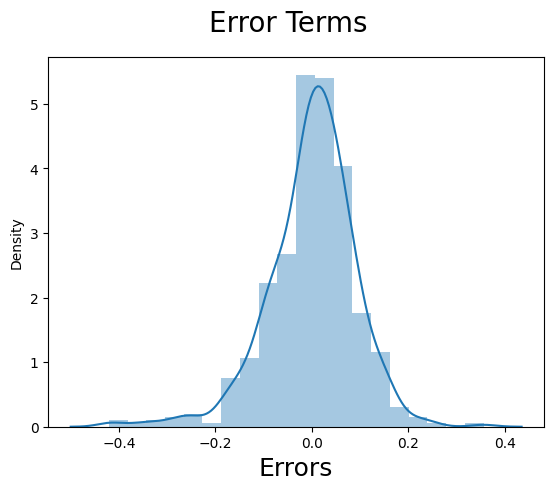

In [207]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

From above plot we can say that Error terms are normally distributed

<h5>Multicollinearity Check

In [211]:
calculate_vif(X_train_rfe_6)

,Features,VIF
2,windspeed,4.59
1,temp,3.90
0,yr,2.07
3,season_spring,2.00
4,season_summer,1.90
5,season_winter,1.64
9,weathersit_Mist,1.54
6,mnth_sep,1.22
7,weekday_sun,1.17
8,weathersit_Light_snow_rain,1.08


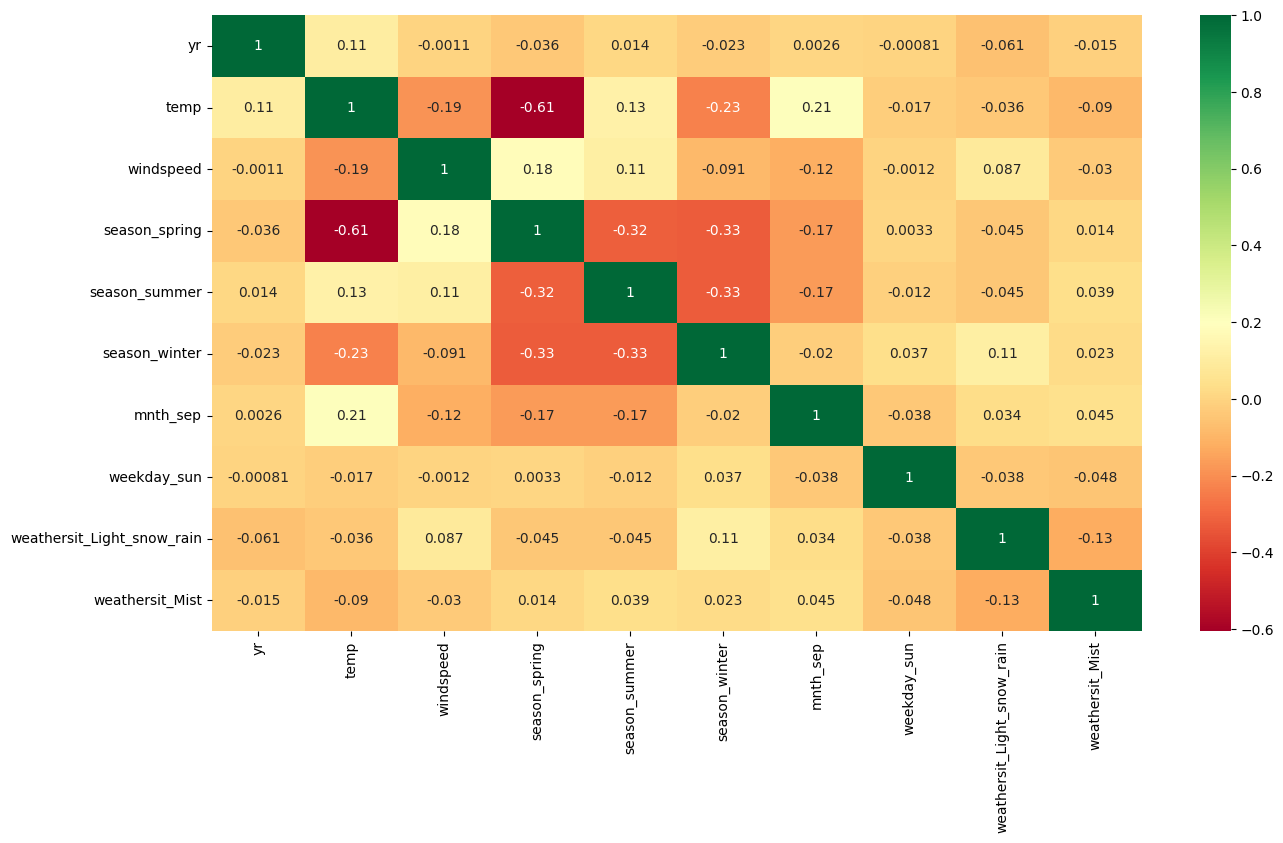

In [212]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_rfe_6.corr(),annot = True, cmap="RdYlGn")
plt.show()


From above heatmap, we can observe that there is no multicollinearity.

<h5> Homoscedasticity Check

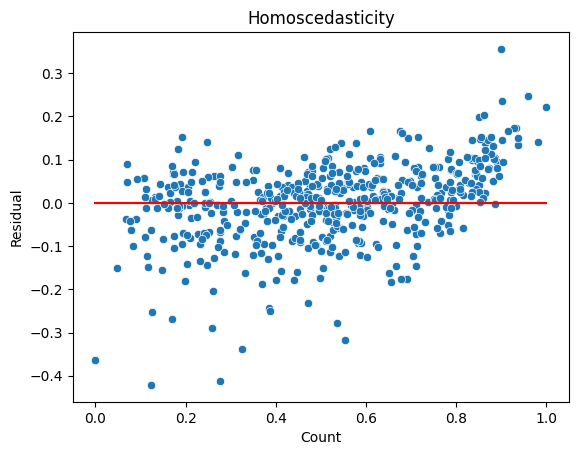

In [213]:
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.title('Homoscedasticity')
plt.show()

From above plot we can observe that there is no visible pattern formed.

Text(0, 0.5, 'y_train_pred')

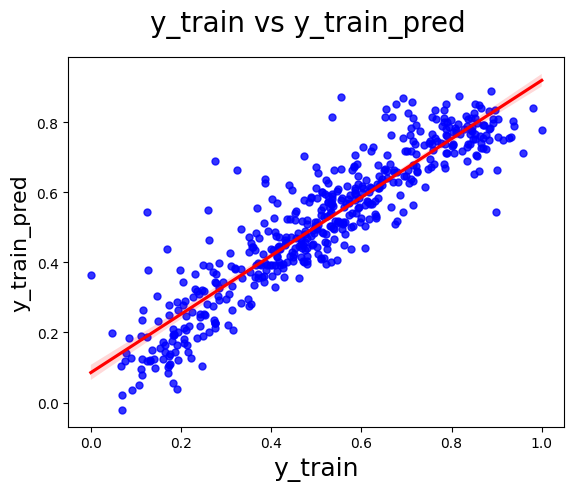

In [214]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_train, y=y_train_pred,line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })
fig.suptitle('y_train vs y_train_pred', fontsize = 20) 
plt.xlabel('y_train', fontsize = 18)
plt.ylabel('y_train_pred', fontsize = 16) 

<h3>Calculating R2 and adjusted R2 score on training set

In [215]:
# Calculate mean squared error of the training set
mse_train = mean_squared_error(y_train, y_train_pred)

# Calculate RMSE
rmse_train = np.sqrt(mse_train)

print(rmse_train)

0.09147503253805211


In [234]:
r2_train = r2_score(y_train, y_train_pred)
round(r2_train,4)

0.8338

In [235]:
adjusted_r2_train = round(1-(1-r2_train)*(x_train_lm.shape[0]-1)/(x_train_lm.shape[0]-x_train_lm.shape[1]-1),4)
print(adjusted_r2_train)

0.8301


The linear model's assumptions hold, indicating it is well-trained and ready for testing on the test set.

<h2>Step 5 : Making Predictions Using the Final Model</h2>

Now that we have fitted the model and checked the normality of error terms, it's time to go ahead and make predictions using the final model.

<h5>Applying the scaling on the test sets

In [216]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

test_df[num_vars] = scaler.transform(test_df[num_vars])
test_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_oct,mnth_sep,weekday_mon,weekday_sat,weekday_sun,weekday_thu,weekday_tue,weekday_wed,weathersit_Light_snow_rain,weathersit_Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


<h5>Dividing into X_test and y_test

In [217]:
y_test=test_df.pop('cnt')
X_test=test_df

In [218]:
y_test.shape

(219,)

In [219]:
X_test.shape

(219, 29)

In [220]:
col1 = X_train_rfe_6.columns
X_test = X_test[col1]
x_test_lm=sm.add_constant(X_test)
y_test_pred = lr_6.predict(x_test_lm)

In [221]:
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.8028

In [222]:
# Calculate Adjusted R2 Score for the test set
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7934


<h3>Step 6: Model Evaluation

In [223]:
round(lr_6.params,4)

const                         0.1958
yr                            0.2343
temp                          0.4799
windspeed                    -0.1499
season_spring                -0.0570
season_summer                 0.0613
season_winter                 0.0951
mnth_sep                      0.0853
weekday_sun                  -0.0462
weathersit_Light_snow_rain   -0.2865
weathersit_Mist              -0.0803
dtype: float64

<h3>We can see that the equation of our best fitted line is:</h3>

cnt = 0.1910 + 0.2343 * yr + 0.4799 * temp - 0.1499 * windspeed + 0.0613 * season_summer + 0.0951 * season_winter + 0.0853 * month_sep -0.0462 * weekday_sun -0.0570 * season_spring - 0.2865* weathersit_Light_snow_rain - 0.0803 * weathersit_Mist

<h3>Calculating R2 and adjusted R2 score on test set

In [231]:
r2_test = r2_score(y_test, y_test_pred)
round(r2_test,4)

0.8028

In [232]:
# Calculate Adjusted R2 Score for the test set
adjusted_r2_test = round(1-(1-r2_test)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2_test)

0.7934


Text(0, 0.5, 'y_test_pred')

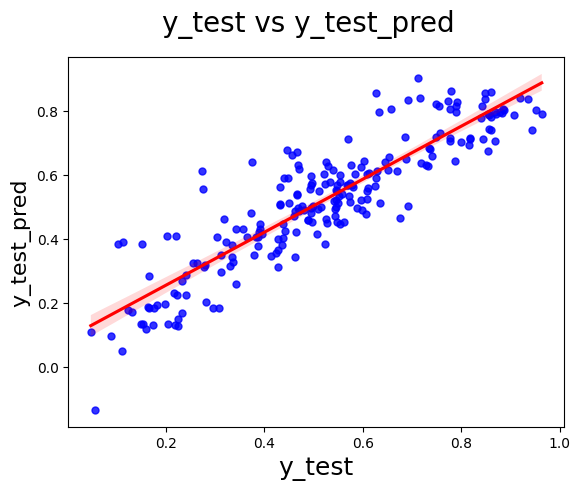

In [228]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
sns.regplot(x=y_test, y=y_test_pred,line_kws = { 'color': 'red' }, scatter_kws = { 's' : 25, 'color': 'blue' })
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_test_pred', fontsize = 16) 

In [229]:
# Calculate mean squared error of the test set
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate RMSE
rmse_test = np.sqrt(mse_test)

print(rmse_test)

0.09676903935333432


<h3>Comparison between Training and Testing Dataset</h3>
<br>
<li>Train dataset R^2 = 0.8338
<li>Train dataset Adjusted R^2 = 0.8301
<li>Test dataset R^2 = 0.8028
<li>Test dataset Adjusted R^2 = 0.7934

<h3>Conclusion:</h3>
<li>We can see that the equation of our best fitted line is:

cnt = 0.1910 + 0.2343 * yr + 0.4799 * temp - 0.1499 * windspeed + 0.0613 * season_summer + 0.0951 * season_winter + 0.0853 * month_sep - 0.0462 * weekday_sun -0.0570 * season_spring - 0.2865* weathersit_Light_snow_rain - 0.0803 * weathersit_Mist
<br>

<li>Three key feature variables - temp, yr, and weathersit_Light_snow_rain exhibit the highest coefficient values, indicating their significant impact.
<li>Significant variables to predict the demand for shared bikes
<ul><li>temp
<li>Year
<li>windspeed
<li>Season - (Summer, Spring and Winter)
<li>months(July, September)
<li>weathersit (Light_snow_rain and Mist)
    
<br>
<h3>Recommendations</h3>
Recommendations for BoomBikes for expanding business:
<li>Company should focus on expanding business during Summer and Winter.
<li>September month has shown great demand.
<li>It has been observed that the demand for bike rentals had gone up from 2018 to 2019. So we can say that it will go up once the situation gets normal post Covid.
<li>There is no much demand during the holidays
<li>There would be less bookings during light rain/mist and no demand in severe weather conditions like heavy rainfall. Clear weather is favorable for bike rentals.
